In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
ad_data = pd.read_csv('Analise_Produtos.csv')

In [3]:
ad_data.head()

,Nome do item,Itens vistos,Itens adicionados ao carrinho,Itens comprados,Receita do item
0,WAHL MÁQUINA DE CORTE MAGIC CLIP CORDLESS BIVO...,5068,1376,276,220.716.705.499
1,LÂMINA WILKINSON GILETES DE BARBIAR CARTELAS C...,443,888,238,6.710.347.921
2,Máquina Wahl 5 Star Limited Edition Gold Cordl...,3406,1036,221,248.118.134.521
3,POMADA MODELADORA CAPILAR MASCULINA JACK BARBE...,385,870,218,2.097.220.416
4,Kit de 5 rolos de gola higiênica - Rolo com 10...,311,1054,214,8.308.595.752


In [4]:
ad_datad = pd.DataFrame(ad_data)

In [5]:
ad_datad.head()

,Nome do item,Itens vistos,Itens adicionados ao carrinho,Itens comprados,Receita do item
0,WAHL MÁQUINA DE CORTE MAGIC CLIP CORDLESS BIVO...,5068,1376,276,220.716.705.499
1,LÂMINA WILKINSON GILETES DE BARBIAR CARTELAS C...,443,888,238,6.710.347.921
2,Máquina Wahl 5 Star Limited Edition Gold Cordl...,3406,1036,221,248.118.134.521
3,POMADA MODELADORA CAPILAR MASCULINA JACK BARBE...,385,870,218,2.097.220.416
4,Kit de 5 rolos de gola higiênica - Rolo com 10...,311,1054,214,8.308.595.752


<Axes: >

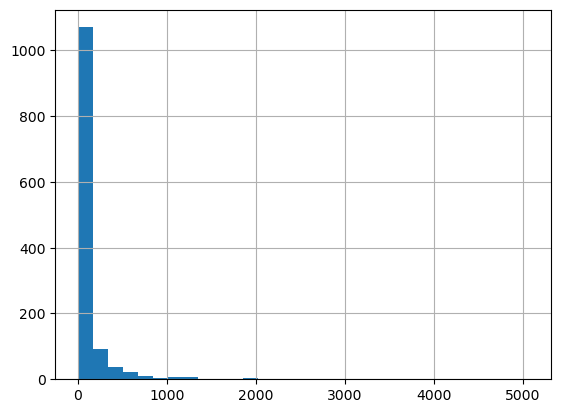

In [6]:
ad_datad['Itens vistos'].hist(bins=30)

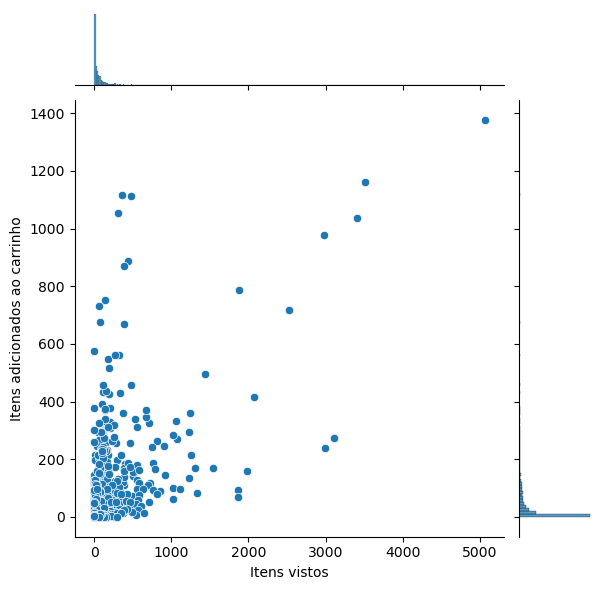

In [7]:
sns.jointplot(x='Itens vistos', y='Itens adicionados ao carrinho', data=ad_datad)

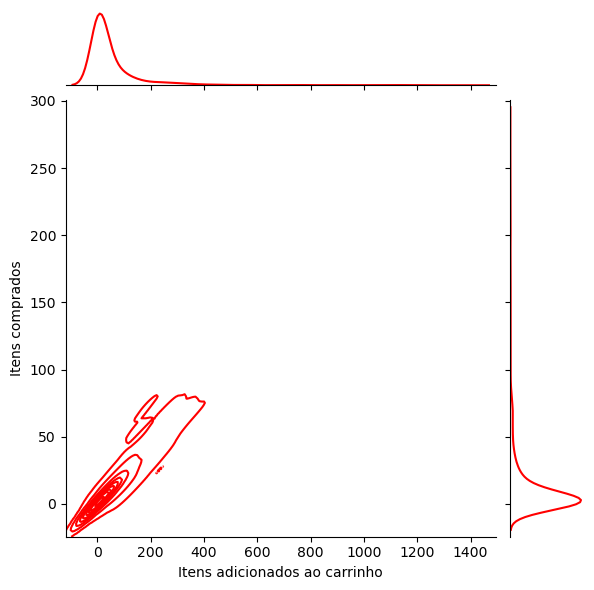

In [8]:
sns.jointplot(x='Itens adicionados ao carrinho', y='Itens comprados', data=ad_datad, color='red', kind='kde');

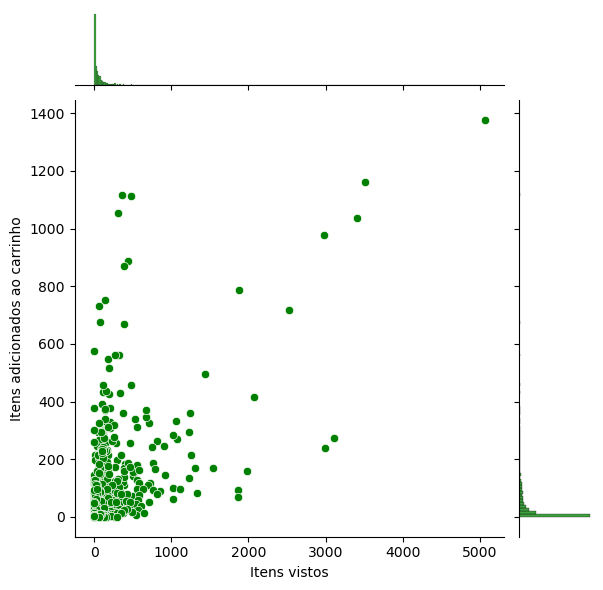

In [9]:
sns.jointplot(x='Itens vistos', y='Itens adicionados ao carrinho', data=ad_data, color='green')

C:\Users\bealm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


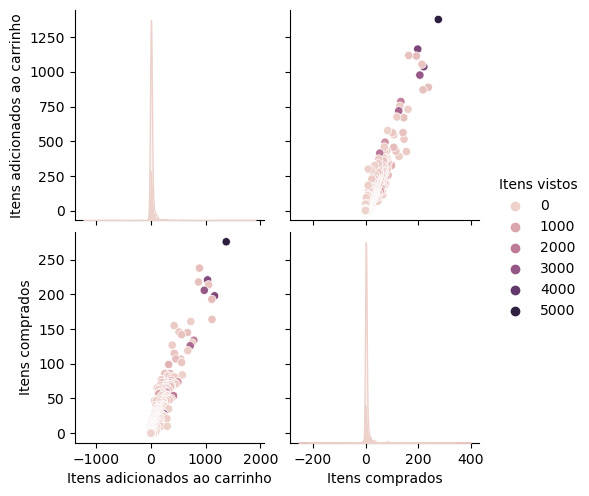

In [10]:
sns.pairplot(ad_data, hue='Itens vistos')

In [11]:
ad_data = ad_data.drop(["Nome do item"], axis=1)

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
Y = ad_data["Itens vistos"]
X = ad_data.loc[:, ad_data.columns!= "Itens comprados"]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [15]:
x_train

,Itens vistos,Itens adicionados ao carrinho,Receita do item
171,96,228,23.762.363
720,53,10,2.297.588.561
860,0,0,164.899.998
1008,10,0,0
293,94,115,430.486.671
...,...,...,...
654,25,18,69.800.002
330,146,27,239.000.004
1144,0,3,0
521,29,14,1596


In [16]:
y_train

171       96
720       53
860        0
1008      10
293       94
        ... 
654       25
330      146
1144       0
521       29
311     1114
Name: Itens vistos, Length: 882, dtype: int64

In [17]:
y_train = y_train[y_train != 'Nome do item']

In [18]:
x_train['Receita do item'] = x_train['Receita do item'].str.replace('.', '').astype(float)


In [19]:
x_train['Itens vistos'] = x_train['Itens vistos'].astype(float)
x_train['Itens adicionados ao carrinho'] = x_train['Itens adicionados ao carrinho'].astype(float)

In [20]:
#LinearRegression 

from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [21]:
alguns_dados = x_train.iloc[:5]
algumas_label = y_train.iloc[:5]

print("Predições:", lin_reg.predict(alguns_dados))
print("Labels:", algumas_label.values)

Predições: [9.60000000e+01 5.30000000e+01 5.60942476e-14 1.00000000e+01
 9.40000000e+01]
Labels: [96 53  0 10 94]


In [22]:
# Converter a coluna 'Receita do item' para float
x_test['Receita do item'] = x_test['Receita do item'].str.replace('.', '').astype(float)

# Converter as outras colunas para float
x_test['Itens vistos'] = x_test['Itens vistos'].astype(float)
x_test['Itens adicionados ao carrinho'] = x_test['Itens adicionados ao carrinho'].astype(float)

In [23]:
alguns_dados

,Itens vistos,Itens adicionados ao carrinho,Receita do item
171,96.0,228.0,2.376236e+07
720,53.0,10.0,2.297589e+09
860,0.0,0.0,1.649000e+08
1008,10.0,0.0,0.000000e+00
293,94.0,115.0,4.304867e+08


In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [25]:
from sklearn.metrics import mean_squared_error

preds = rf_reg.predict(x_train)
rf_mse = mean_squared_error(y_train, preds)

rf_rmse = np.sqrt(rf_mse)
rf_rmse

12.351823338921205

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Criar uma instância do modelo RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Realizar a validação cruzada com o estimador RandomForestRegressor
scores = cross_val_score(rf_regressor, x_train, y_train, scoring="neg_mean_squared_error", cv=10)


In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_regressor, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rf_regressor_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(rf_regressor_scores)

Scores: [49.86681937 50.3995426   1.28811128 62.5853529  30.42069059  3.4127991
  2.54238301  9.08194312 45.83484517 18.02437601]
Mean: 27.34568631679287
Standard deviation: 22.179395334393543


In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2,4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring = 'neg_mean_squared_error',
                          )

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [36]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [37]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=3, n_estimators=10)

In [38]:
final_model = grid_search.best_estimator_
final_model_predictions = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_model_predictions)
print(np.sqrt(final_mse))

83.80764192081277


In [45]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(y=y_test.values),
                      go.Scatter(y=final_model_predictions)])
fig.show()

In [46]:
from sklearn.metrics import classification_report, confusion_matrix


In [47]:
y_test = final_model.predict(x_test)
print(classification_report(x_test, y_test))
print(confusion_matrix(x_test, y_test))

C:\Users\bealm\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:245: RuntimeWarning:

invalid value encountered in cast



ValueError: Classification metrics can't handle a mix of continuous-multioutput and continuous targets

In [50]:
import numpy as np

# Verificar a forma (shape) do array
print("Shape do array:", y_test.shape)

# Verificar o tipo de dados (dtype) do array
print("Tipo de dados do array:", y_test.dtype)

# Verificar o tamanho (size) do array
print("Tamanho do array:", y_test.size)

Shape do array: (379,)
Tipo de dados do array: float64
Tamanho do array: 379


array([2.5640e+02, 1.3900e+02, 0.0000e+00, 1.0000e+01, 1.6000e+01,
       3.4650e+02, 3.7000e+01, 1.5730e+02, 0.0000e+00, 4.3000e+01,
       3.0000e+01, 2.7410e+02, 0.0000e+00, 1.0000e+00, 3.0000e+00,
       1.1770e+02, 9.0000e+00, 8.2000e+01, 1.1890e+02, 2.1000e+01,
       1.0000e+00, 2.8950e+02, 5.1700e+01, 6.5500e+01, 3.2000e+01,
       3.6000e+01, 0.0000e+00, 1.0000e+01, 0.0000e+00, 7.7000e+01,
       1.0000e+00, 5.5000e+01, 3.0000e+00, 4.3000e+01, 6.7000e+01,
       1.2000e+01, 2.0000e+01, 3.8000e+01, 7.1000e+01, 7.7000e+01,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.8000e+01,
       6.7000e+01, 1.3940e+02, 1.2000e+01, 0.0000e+00, 4.4000e+01,
       4.0000e+01, 0.0000e+00, 8.3000e+01, 1.0000e+00, 1.1890e+02,
       0.0000e+00, 0.0000e+00, 1.3940e+02, 6.7310e+02, 0.0000e+00,
       1.3360e+02, 2.0000e+00, 1.3000e+01, 7.8000e+01, 1.2000e+01,
       1.0150e+03, 6.7230e+02, 3.0480e+02, 5.0000e+00, 3.5000e+01,
       1.0000e+00, 1.2468e+03, 2.7000e+01, 1.0000e+00, 1.0840e